# Decision Tree (Sans Bagging, avec splitter "best")

L'algorithme Decision Tree CART est un algorithme de classification qui crée un arbre. À chaque noeud, il y a un seuil de discrimination ainsi qu'une feature associée à ce seuil. À chaque feuille, il y a la distribution des éléments en fonctions des classes.
CART construit donc un arbre binaire, qui classifie les éléments en les faisant tomber depuis la racine de l'arbre, ils passent ou passent pas les seuils des noeuds, arrivant dans une certaine feuille qui leur donnera une classe.
Pour créer les seuils des noeuds on va itérer sur chacune des features et chercher l'élément dont la valeur de l'attribut séparerai le mieux le dataset. Sauf que pour pouvoir comparer et déterminer le meilleur seuil il nous faut des critères (criterions en anglais). Nous avons essayé deux critères de pureté: Gini et Log-loss. Voyons comment ils réagissent sur des exemples concrets.

## Chargement des données et prétraitement

In [1]:
from ias import DecisionTree, PCA, split_dataset, RandomForest
from ias.Datasets import Iris, Emnist
from ias.Metrics import accuracy_score, confusion_matrix, show_confusion_matrix
import sklearn.tree as tree
import matplotlib.pyplot as plt

In [2]:
iris_train_x, iris_train_y, iris_test_x, iris_test_y = split_dataset(0.6, Iris)

In [3]:
emnist_train_x, emnist_train_y, emnist_test_x, emnist_test_y = split_dataset(1000, Emnist)

pca = PCA(0.90)
pca.fit(emnist_train_x)

emnist_compressed_train_x = pca.compress(emnist_train_x)
emnist_compressed_test_x = pca.compress(emnist_test_x)

## Comparaison sur Iris

In [4]:
# arbre avec critère Gini
iris_tree_gini = DecisionTree(max_depth=5, splitter="best", criterion_name="gini")
iris_tree_gini.fit(iris_train_x, iris_train_y)
iris_pred_gini = iris_tree_gini.predict(iris_test_x)

In [5]:
# arbre avec critère Log-loss
iris_tree_log_loss = DecisionTree(max_depth=5, splitter="best", criterion_name="log_loss")
iris_tree_log_loss.fit(iris_train_x, iris_train_y)
iris_pred_log_loss = iris_tree_log_loss.predict(iris_test_x)

In [6]:
# version sklearn
iris_tree_sklearn_gini = tree.DecisionTreeClassifier(max_depth=5, criterion="gini")
iris_tree_sklearn_gini = iris_tree_sklearn_gini.fit(iris_train_x, iris_train_y)
iris_pred_sklearn_gini = iris_tree_sklearn_gini.predict(iris_test_x)

iris_tree_sklearn_log_loss = tree.DecisionTreeClassifier(max_depth=5, criterion="log_loss")
iris_tree_sklearn_log_loss = iris_tree_sklearn_log_loss.fit(iris_train_x, iris_train_y)
iris_pred_sklearn_log_loss = iris_tree_sklearn_log_loss.predict(iris_test_x)

Accuracy score gini (homemade) : 0.967
Accuracy score sklearn gini : 0.983


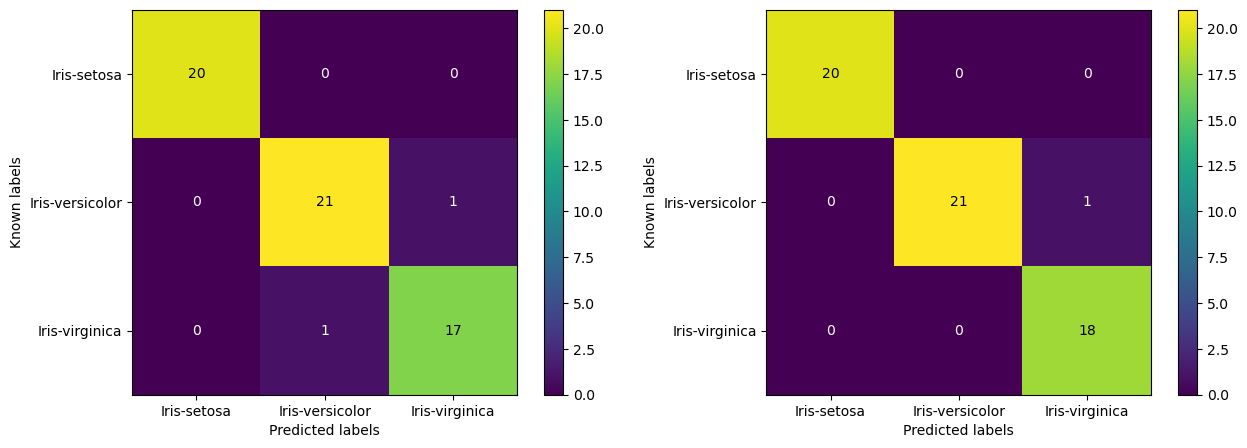

In [7]:
# comparons les matrices de confusions pour Gini
iris_c_matrix_gini = confusion_matrix(Iris.class_number, iris_test_y, iris_pred_gini)
iris_c_matrix_gini_sklearn = confusion_matrix(Iris.class_number, iris_test_y, iris_pred_sklearn_gini)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
show_confusion_matrix(iris_c_matrix_gini, Iris.class_names, ax=ax1)
show_confusion_matrix(iris_c_matrix_gini_sklearn, Iris.class_names, ax=ax2)

print(f"Accuracy score gini (homemade) : {accuracy_score(iris_test_y, iris_pred_gini):.3f}")
print(f"Accuracy score sklearn gini : {accuracy_score(iris_test_y, iris_pred_sklearn_gini):.3f}")

Accuracy score log_loss (homemade) : 0.967
Accuracy score sklearn log_loss : 0.950


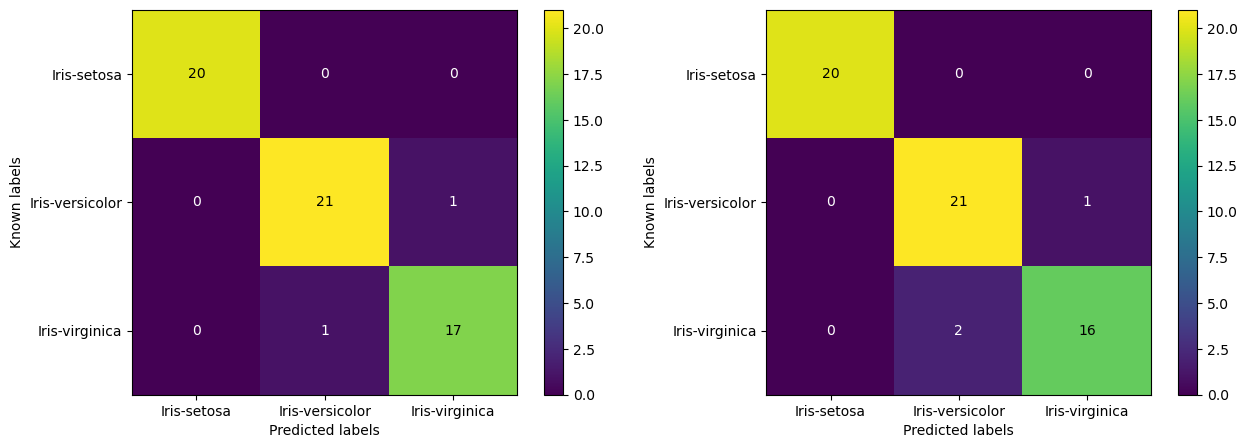

In [8]:
# comparons les matrices de confusions pour Log-Loss
iris_c_matrix_log_loss = confusion_matrix(Iris.class_number, iris_test_y, iris_pred_log_loss)
iris_c_matrix_log_loss_sklearn = confusion_matrix(Iris.class_number, iris_test_y, iris_pred_sklearn_log_loss)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
show_confusion_matrix(iris_c_matrix_log_loss, Iris.class_names, ax=ax1)
show_confusion_matrix(iris_c_matrix_log_loss_sklearn, Iris.class_names, ax=ax2)

print(f"Accuracy score log_loss (homemade) : {accuracy_score(iris_test_y, iris_pred_log_loss):.3f}")
print(f"Accuracy score sklearn log_loss : {accuracy_score(iris_test_y, iris_pred_sklearn_log_loss):.3f}")

### Conclusions

Nos versions du Decision Tree, sur ce petit dataset obtiennent exactement les mêmes résultats que sklearn.
On observe que le critère `Gini` semble légèrement meilleur que `Log-Loss`. Vérifions sur eMNIST !

## Comparaison sur eMNIST

In [9]:
# arbre avec critère Gini
emnist_tree_gini = DecisionTree(max_depth=5, splitter="best", criterion_name="gini")
emnist_tree_gini.fit(emnist_train_x, emnist_train_y)
emnist_pred_gini = emnist_tree_gini.predict(emnist_test_x)

In [10]:
# arbre avec critère Log-loss
emnist_tree_log_loss = DecisionTree(max_depth=5, splitter="best", criterion_name="log_loss")
emnist_tree_log_loss.fit(emnist_train_x, emnist_train_y)
emnist_pred_log_loss = emnist_tree_log_loss.predict(emnist_test_x)

In [11]:
# version sklearn
emnist_tree_sklearn_gini = tree.DecisionTreeClassifier(max_depth=5, criterion="gini")
emnist_tree_sklearn_gini = emnist_tree_sklearn_gini.fit(emnist_train_x, emnist_train_y)
emnist_pred_sklearn_gini = emnist_tree_sklearn_gini.predict(emnist_test_x)

emnist_tree_sklearn_log_loss = tree.DecisionTreeClassifier(max_depth=5, criterion="log_loss")
emnist_tree_sklearn_log_loss = emnist_tree_sklearn_log_loss.fit(emnist_train_x, emnist_train_y)
emnist_pred_sklearn_log_loss = emnist_tree_sklearn_log_loss.predict(emnist_test_x)

Accuracy score gini (homemade) : 0.557
Accuracy score sklearn gini : 0.603


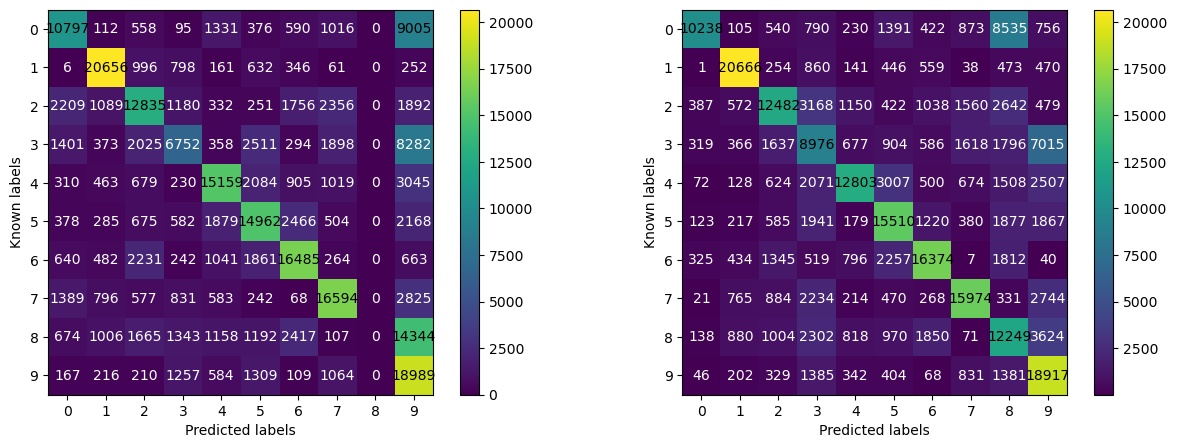

In [12]:
# comparons les matrices de confusions pour Gini
emnist_c_matrix_gini = confusion_matrix(Emnist.class_number, emnist_test_y, emnist_pred_gini)
emnist_c_matrix_gini_sklearn = confusion_matrix(Emnist.class_number, emnist_test_y, emnist_pred_sklearn_gini)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
show_confusion_matrix(emnist_c_matrix_gini, Emnist.class_names, ax=ax1)
show_confusion_matrix(emnist_c_matrix_gini_sklearn, Emnist.class_names, ax=ax2)

print(f"Accuracy score gini (homemade) : {accuracy_score(emnist_test_y, emnist_pred_gini):.3f}")
print(f"Accuracy score sklearn gini : {accuracy_score(emnist_test_y, emnist_pred_sklearn_gini):.3f}")

Accuracy score log_loss (homemade) : 0.613
Accuracy score sklearn log_loss : 0.685


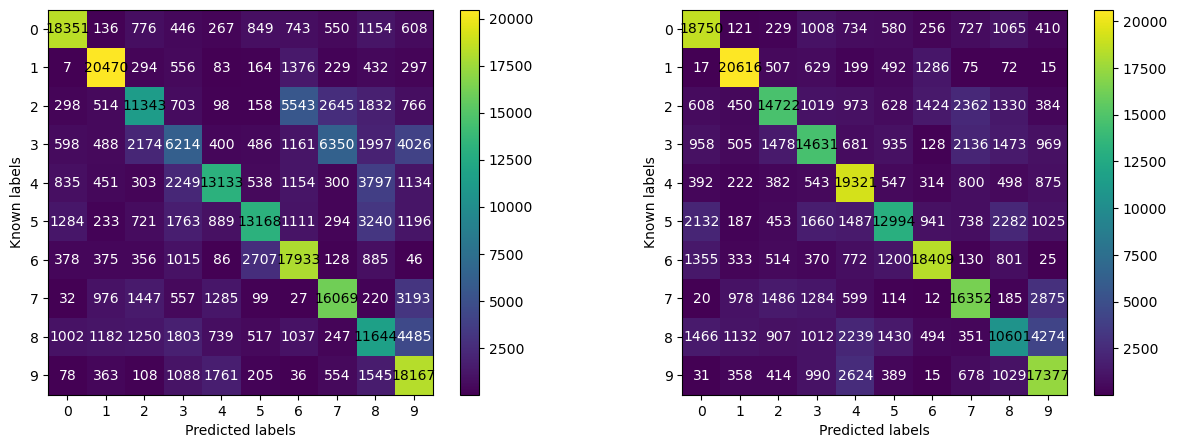

In [13]:
# comparons les matrices de confusions pour Log-Loss
emnist_c_matrix_log_loss = confusion_matrix(Emnist.class_number, emnist_test_y, emnist_pred_log_loss)
emnist_c_matrix_log_loss_sklearn = confusion_matrix(Emnist.class_number, emnist_test_y, emnist_pred_sklearn_log_loss)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
show_confusion_matrix(emnist_c_matrix_log_loss, Emnist.class_names, ax=ax1)
show_confusion_matrix(emnist_c_matrix_log_loss_sklearn, Emnist.class_names, ax=ax2)

print(f"Accuracy score log_loss (homemade) : {accuracy_score(emnist_test_y, emnist_pred_log_loss):.3f}")
print(f"Accuracy score sklearn log_loss : {accuracy_score(emnist_test_y, emnist_pred_sklearn_log_loss):.3f}")

### Conclusions

On observe déjà que les version sklearn s'effectuent bien plus rapidement.
Sur un dataset plus complexe comme eMNIST, l'efficacité du Decision Tree s'effondre.
Le critère n'a pas beaucoup d'influence ici. Par contre notre algo reste assez proche de celui de sklearn en terme de d'efficacité de la classification.